# Task: Prediction using Decision Tree Algorithm

## Objective: Create the Decision Tree classifier and visualize it graphically.

## Presented by: Simran Jain

### IMPORT LIBRARIES

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 

### READ THE DATA

In [105]:
df=pd.read_csv('Iris.csv')

In [106]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### SHAPE OF THE DATA

In [107]:
print('Number of Observations in Data:', df.shape[0])
print('Number of variables in Data:', df.shape[1])

Number of Observations in Data: 150
Number of variables in Data: 6


### DESCRIBING DATA

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [109]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### ENCODED TARGET VARIABLE

In [110]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Target']= label_encoder.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [111]:
data=df.copy()

In [112]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### DROP COLUMNS

In [113]:
df.drop(['Id','Species','Target'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### DISTRIBUTION OF DATA

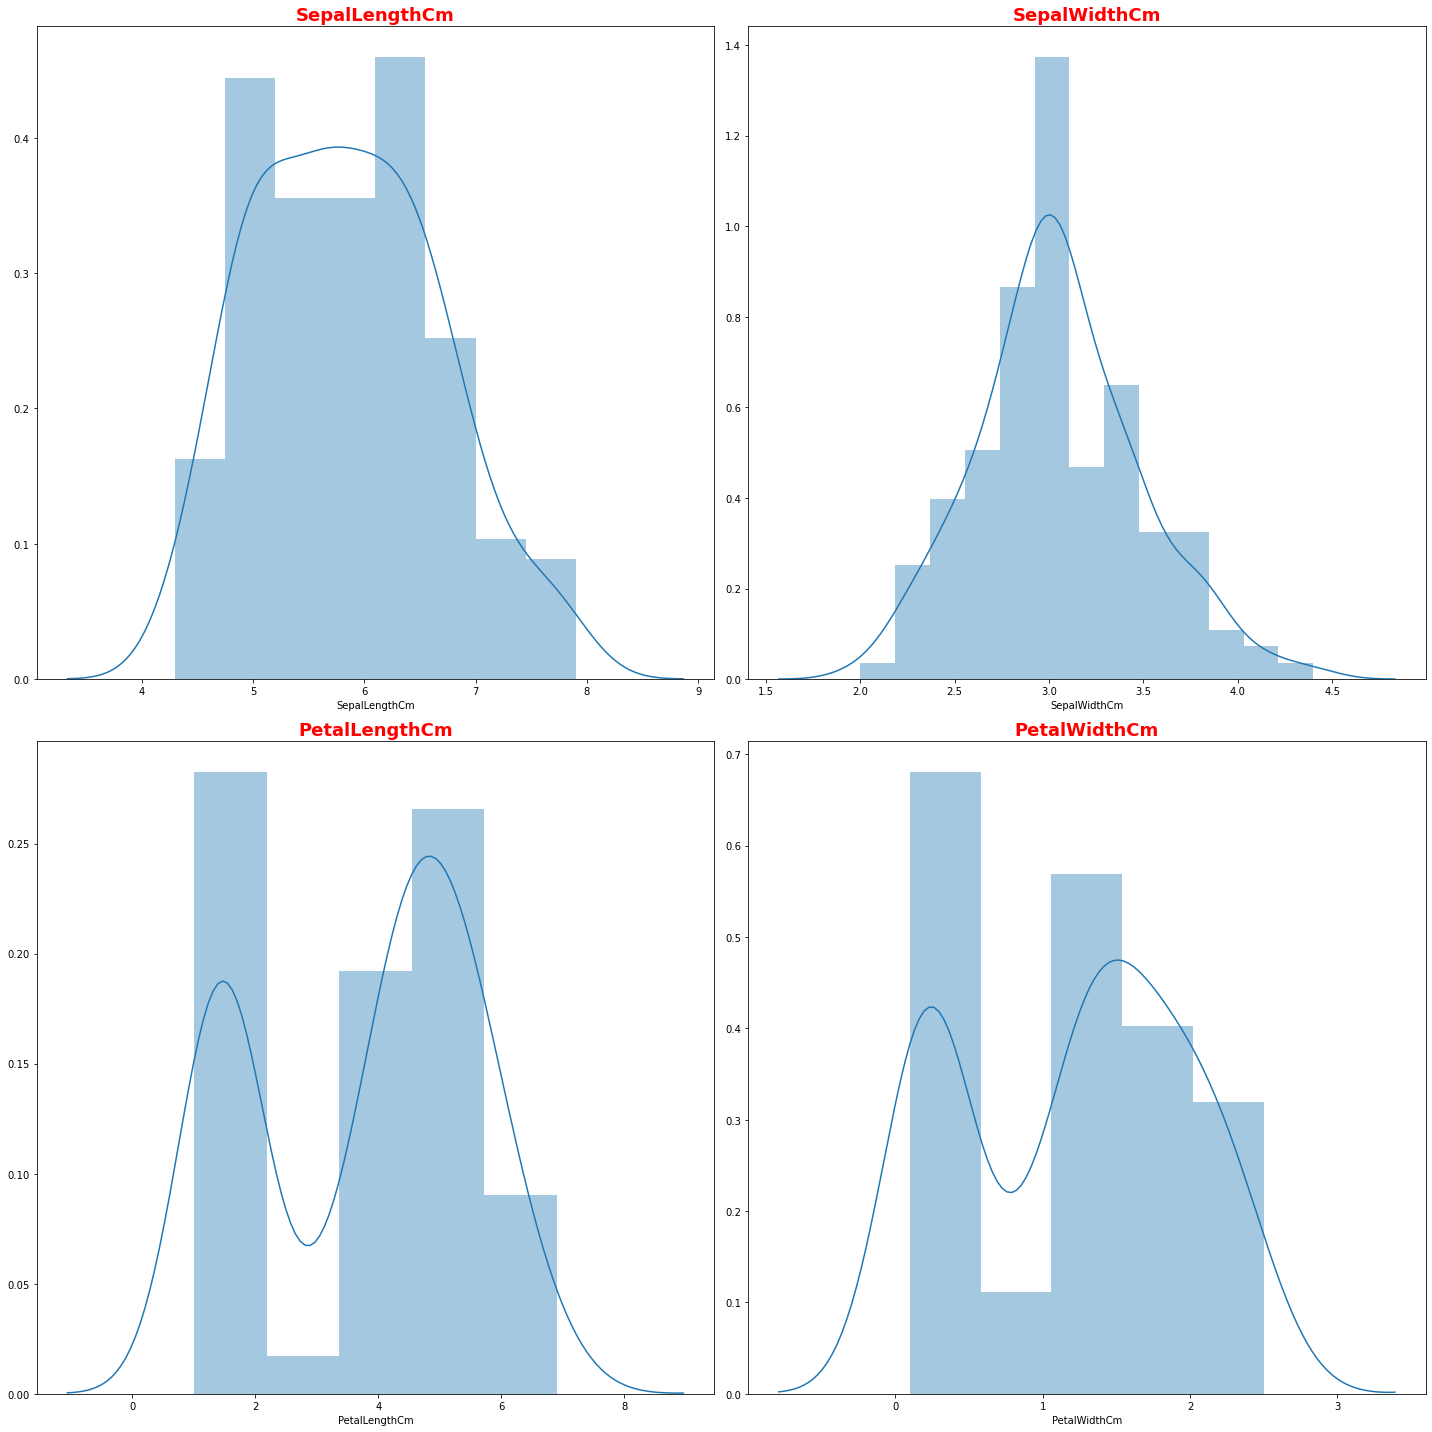

In [114]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='red',fontsize=18,fontweight ='bold')
plt.tight_layout()

In [115]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

### PAIR PLOT

C:\Users\jsimr\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jsimr\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jsimr\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


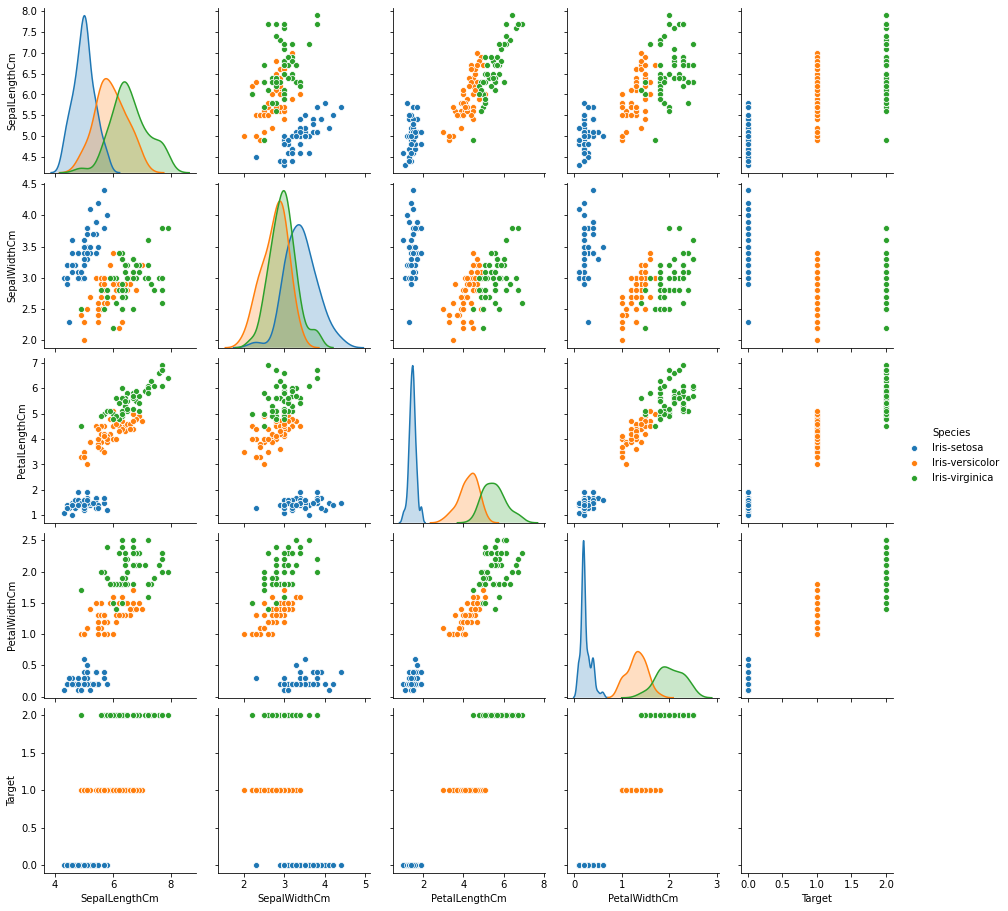

In [116]:
sns.pairplot(data.drop('Id',axis=1),hue='Species')

## OUTLIER CHECK AND REMOVAL

In [117]:
data.drop(['Id','Species'], axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


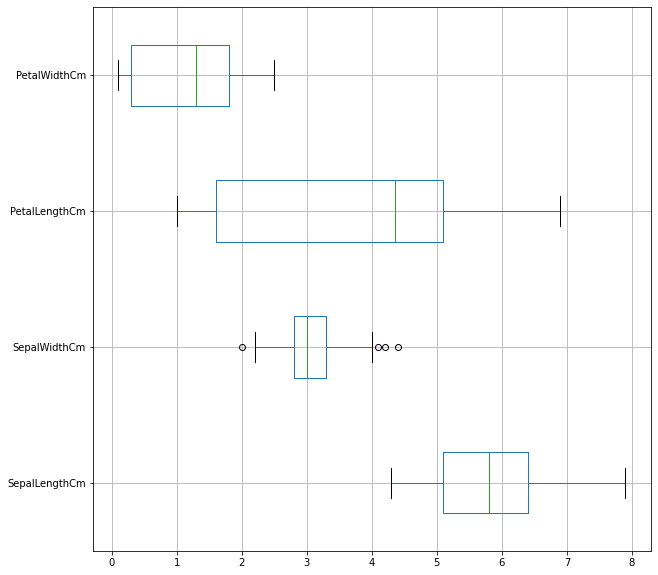

In [118]:
columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
plt.figure(figsize=(10,10))
data[columns].boxplot(vert=0)
plt.show()

In [119]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [120]:
lr,ur=treat_outlier(data['SepalWidthCm'])
data['SepalWidthCm']=np.where(data['SepalWidthCm']>ur,ur,data['SepalWidthCm'])
data['SepalWidthCm']=np.where(data['SepalWidthCm']<lr,lr,data['SepalWidthCm'])

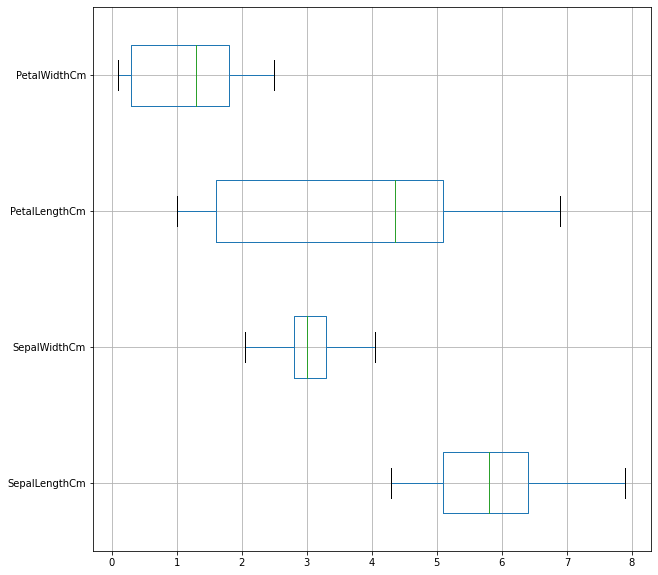

In [121]:
plt.figure(figsize=(10,10))
data[columns].boxplot(vert=0)
plt.show()

### EXTRACTING TARGET COLUMN

In [122]:
X = data.drop("Target", axis=1)

Y = data.pop("Target")

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### SPLITTING DATASET

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

In [150]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (105, 4)
X_test (45, 4)
train_labels (105,)
test_labels (45,)


### BUILD MODEL

In [151]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier(max_features=4,max_depth=60)
model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=60, max_features=4)

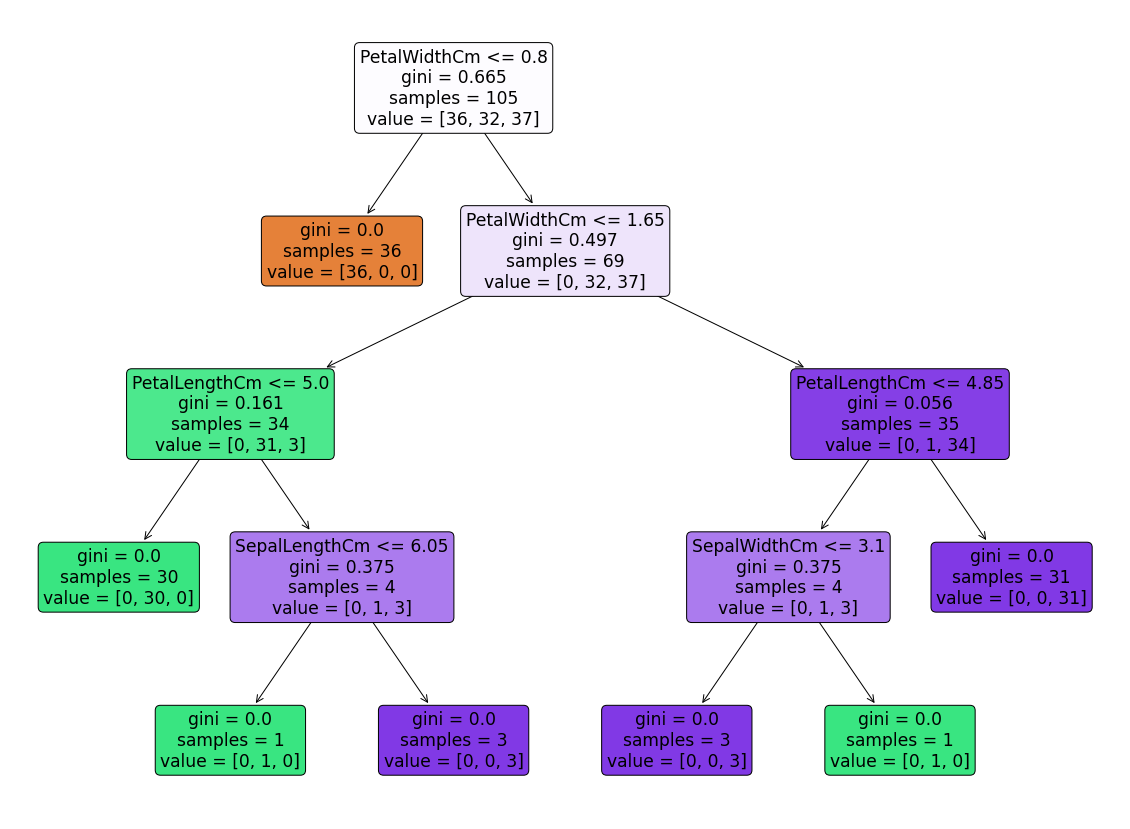

In [152]:
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True,feature_names=data.columns,rounded=True) 
plt.show()

### PREDICTING TEST DATA

In [154]:
predict = model.predict(X_test)
predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

### MODEL EVALUATION

In [155]:
from sklearn.metrics import classification_report,confusion_matrix

In [156]:
confusion_matrix(test_labels, predict)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [161]:
model.score(X_test, test_labels) 

0.9555555555555556